In [1]:
import pandas as pd

df = pd.read_csv("data/healthcare_data.csv")
print(df.head())



FileNotFoundError: [Errno 2] No such file or directory: 'data/healthcare_data.csv'

In [2]:
import sys
print(sys.executable)


/Users/suvendusahoo/Healthcare_Linear_Regression/venv/bin/python3


In [1]:
import pandas as pd
df = pd.read_csv("data/healthcare_data.csv")
df.head()


FileNotFoundError: [Errno 2] No such file or directory: 'data/healthcare_data.csv'

In [2]:
import os
print(os.getcwd())


/Users/suvendusahoo/Healthcare_Linear_Regression/notebooks


In [3]:
df = pd.read_csv("../data/healthcare_data.csv")
df.head()


,Age,BMI,BloodPressure,Cholesterol,Glucose,Smoking,RiskScore
0,25,22.4,118,180,92,0,45.2
1,34,26.1,125,190,98,0,54.1
2,45,29.8,135,210,110,1,68.4
3,52,31.2,140,225,130,1,75.9
4,60,28.5,138,240,145,1,78.3


In [4]:
import pandas as pd

df = pd.read_csv("../data/healthcare_data.csv")
print(df.shape)
df.head()


(30, 7)


,Age,BMI,BloodPressure,Cholesterol,Glucose,Smoking,RiskScore
0,25,22.4,118,180,92,0,45.2
1,34,26.1,125,190,98,0,54.1
2,45,29.8,135,210,110,1,68.4
3,52,31.2,140,225,130,1,75.9
4,60,28.5,138,240,145,1,78.3


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Age            30 non-null     int64  
 1   BMI            30 non-null     float64
 2   BloodPressure  30 non-null     int64  
 3   Cholesterol    30 non-null     int64  
 4   Glucose        30 non-null     int64  
 5   Smoking        30 non-null     int64  
 6   RiskScore      30 non-null     float64
dtypes: float64(2), int64(5)
memory usage: 1.8 KB


In [6]:
df.describe()


,Age,BMI,BloodPressure,Cholesterol,Glucose,Smoking,RiskScore
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,44.266667,27.966667,132.033333,214.533333,124.966667,0.566667,66.503333
std,11.377332,3.511099,13.124033,29.219424,28.966667,0.504007,13.860225
min,25.000000,21.900000,108.000000,170.000000,88.000000,0.000000,44.100000
25%,35.250000,24.900000,120.500000,191.250000,98.500000,0.000000,54.775000
50%,44.500000,28.400000,134.500000,212.500000,117.500000,1.000000,67.450000
75%,53.500000,30.550000,141.500000,238.750000,148.750000,1.000000,77.925000
max,65.000000,34.100000,155.000000,270.000000,180.000000,1.000000,89.600000


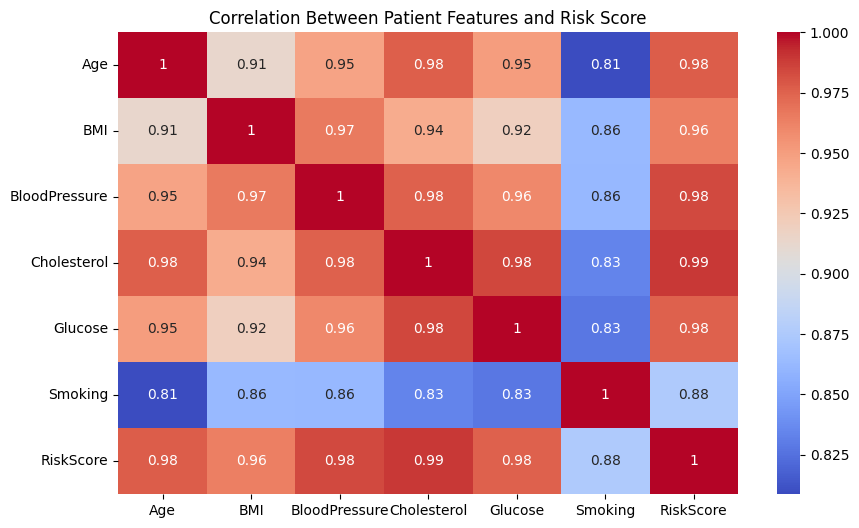

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Between Patient Features and Risk Score")
plt.show()



In [14]:
X = df.drop("RiskScore", axis=1)
y = df["RiskScore"]


In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [17]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)


,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [18]:
y_pred = model.predict(X_test)


In [19]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("MAE:", mae)
print("RMSE:", rmse)
print("R² Score:", r2)


MAE: 0.9509325864302921
RMSE: 1.0605146753761403
R² Score: 0.9900038293220554


In [21]:
importance = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": model.coef_
}).sort_values(by="Coefficient", ascending=False)

importance


,Feature,Coefficient
5,Smoking,2.820139
1,BMI,0.725677
0,Age,0.510808
2,BloodPressure,0.177096
4,Glucose,0.106554
3,Cholesterol,-0.032245


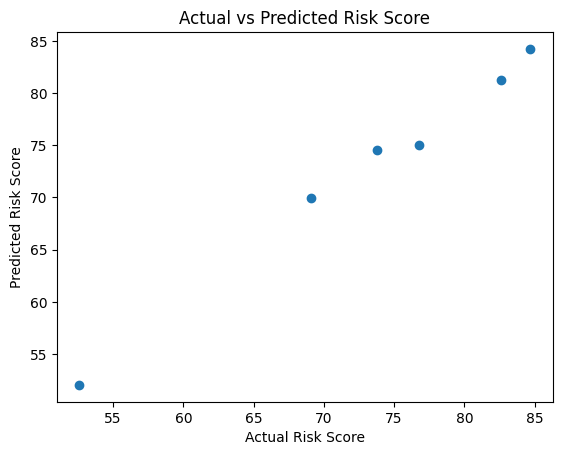

In [22]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Risk Score")
plt.ylabel("Predicted Risk Score")
plt.title("Actual vs Predicted Risk Score")
plt.show()


In [24]:
new_patient = pd.DataFrame({
    "Age": [55],
    "BMI": [31],
    "BloodPressure": [145],
    "Cholesterol": [220],
    "Glucose": [160],
    "Smoking": [1]
})

predicted_risk = model.predict(new_patient)
print("Predicted Risk Score:", predicted_risk[0])


Predicted Risk Score: 81.1742014375081
